In [1]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

Using TensorFlow backend.


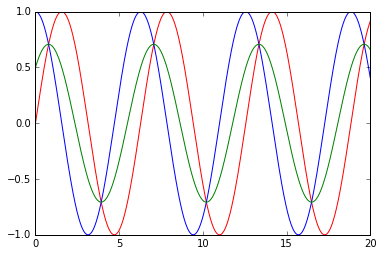

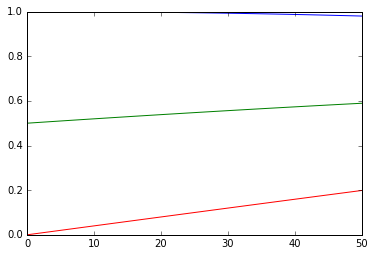

In [24]:
def sin(t):
    return np.sin(t)

def cos(t):
    return np.cos(t)

# 0 to 20 for multiple periods
t = np.linspace(0, 20, 5000)

sin_wave = sin(t)
cos_wave = cos(t)
avg_wave = 0.5 * (sin_wave + cos_wave)
    
plt.cla()
plt.plot(t, sin_wave, "r-")
plt.plot(t, cos_wave, "b-")
plt.plot(t, avg_wave, "g-")
plt.show()


seq_len = 50
sequence_length = seq_len + 1
x_train_sin = []
x_train_cos = []
y_train = []
for index in range(len(sin_wave) - sequence_length):
    x_train_sin.append(sin_wave[index: index + sequence_length])
    x_train_cos.append(cos_wave[index: index + sequence_length])
    y_train.append(avg_wave[index: index + sequence_length])

x_train_sin = np.array(x_train_sin)
x_train_cos = np.array(x_train_cos)
y_train = np.array(y_train)

# len(x_train_sin) = len(x_train_cos) = len(y_train) = 4949
# len(x_train_sin[0]) = len(x_train_cos[0]) = len(y_train[0]) = 51

t_two = np.linspace(0, 50, 51)

plt.cla()
plt.plot(t_two, x_train_sin[0], "r-")
plt.plot(t_two, x_train_cos[0], "b-")
plt.plot(t_two, y_train[0], "g-")
plt.show()

# x_train_sin = np.reshape(x_train_sin, (x_train_sin.shape[0], x_train_sin.shape[1], 1))
# x_train_cos = np.reshape(x_train_cos, (x_train_cos.shape[0], x_train_cos.shape[1], 1))

In [25]:
def build_model(layers):
    
    model = Sequential()
    
    model.add(LSTM(
        input_dim = layers[0],
        output_dim = layers[1],
        return_sequences = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(
        layers[2],
        return_sequences = False))
    model.add(Dropout(0.2))
    
    model.add(Dense(
        output_dim = layers[3]))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

In [31]:
epochs = 1

x_train = [x_train_sin, x_train_cos]
x_train = np.array(x_train)

# x_train.shape = (2, 4949, 51)
# y_train.shape = (4949, 51)

model = build_model([2, 51, 100, 51])

model.summary()

model.fit(x_train,
          y_train,
          batch_size=512,
          nb_epoch=epochs,
          validation_split=0.1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=51, return_sequences=True, input_shape=(None, 2))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, None, 51)          11016     
_________________________________________________________________
dropout_15 (Dropout)         (None, None, 51)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               60800     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 51)                5151      
_________________________________________________________________
activation_8 (Activation)    (None, 51)                0         
Total params: 76,967
Trainable params: 76,967
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=51)`


ValueError: Error when checking input: expected lstm_15_input to have shape (None, 2) but got array with shape (4949, 51)